# ♻️ Project 01:  쓰레기 분류
---

## 주제: 쓰레기 분류 (사전 훈련 모델 + 분류기)
---

### 목표 (Target)
- **옷** (Clothes)
- **유리** (Glass)
- **금속** (Metal)
- **종이** (Paper)
- **플라스틱** (Plastic)


### 목차
1. 이미지 불러오기.
2. 데이터 프레임으로 file 경로 및 target 분류.
3. 데이터 훈련.
4. 데이터 검증.
5. 결론.

## 1. 이미지 불러오기

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 128
BATCH_SIZE = 64

idg = ImageDataGenerator()

original_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/original/'
original_generator = idg.flow_from_directory(original_dir,
                                             target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/Test'
test_generator = idg.flow_from_directory(original_dir,
                                             target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical')

print(original_generator.class_indices)
print(test_generator.class_indices)

Found 1201 images belonging to 5 classes.
Found 1201 images belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [2]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'CLOTHES', 1: 'GLASS', 2: 'METAL', 3: 'PAPER', 4: 'PLASTIC'}

In [3]:
original_target_names = []
test_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])
    
print(original_target_names.__len__(), test_target_names.__len__())

1201 1201


# 2. 데이터 프레임으로 file 경로 및 target 분류.

In [4]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
1,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
2,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
3,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
4,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
...,...,...,...
1196,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1197,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1198,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1199,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4


,file_paths,target_names,targets
0,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
1,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
2,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
3,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
4,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,CLOTHES,0
...,...,...,...
1196,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1197,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1198,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4
1199,./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...,PLASTIC,4


In [5]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
4    336
3    199
1    193
0    144
2     88
Name: count, dtype: int64
targets
4    85
3    50
1    48
0    36
2    22
Name: count, dtype: int64


In [10]:
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(960, 3)
(241, 3)
(1201, 3)


In [6]:
# import shutil
# import os.path

# base_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/'


# for filepath in train_images:
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [7]:
# import shutil
# import os.path

# base_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/'


# for filepath in train_images:
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

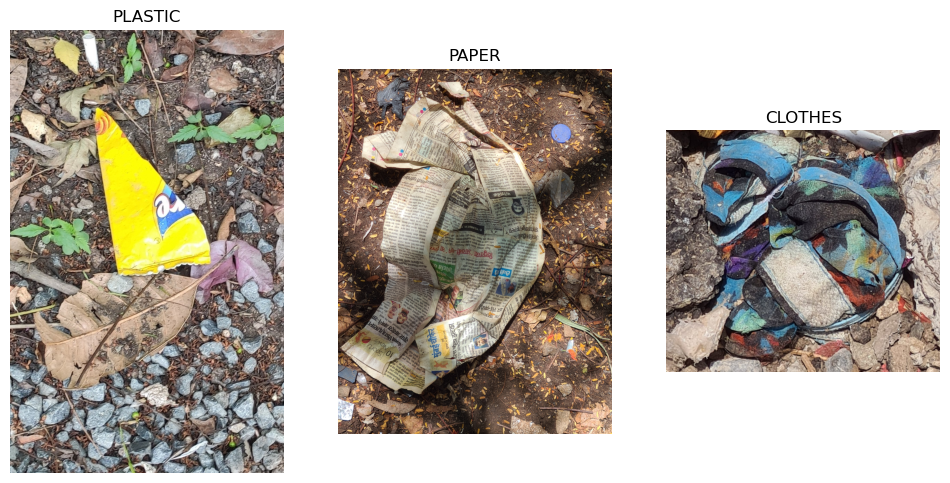

In [11]:
import cv2
import matplotlib.pyplot as plt

train_image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[300]), cv2.COLOR_BGR2RGB)
validation_image = cv2.cvtColor(cv2.imread(validation_df.file_paths.iloc[40]), cv2.COLOR_BGR2RGB)
test_image = cv2.cvtColor(cv2.imread(test_df.file_paths.iloc[120]), cv2.COLOR_BGR2RGB)


figure, axs = plt.subplots(figsize= (12,12), nrows=1, ncols=3)

axs[0].imshow(train_image)
axs[0].set_title(train_df.target_names.iloc[300])
axs[0].axis('off')

axs[1].imshow(validation_image)
axs[1].set_title(validation_df.target_names.iloc[40])
axs[1].axis('off')

axs[2].imshow(test_image)
axs[2].set_title(test_df.target_names.iloc[120])
axs[2].axis('off')

plt.show()



# 3-1. 데이터프레임 Image 전처리 (applications = xception)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [14]:
model = Xception()
model.summary()

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 76s 1us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

# 3-1-1. model 의 분류기에서 Dense 개수 조절을 위한 create_model 사용

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2



def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_24[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [29]:
N_EPOCHS = 2

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/2


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - acc: 0.3192 - loss: 1.6046 - val_acc: 0.3983 - val_loss: 1.8872 - learning_rate: 0.0010
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - acc: 0.4867 - loss: 1.2544 - val_acc: 0.3859 - val_loss: 2.9542 - learning_rate: 0.0010


In [30]:
N_EPOCHS = 5

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - acc: 0.6334 - loss: 1.0176 - val_acc: 0.3693 - val_loss: 2.3296 - learning_rate: 0.0010
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - acc: 0.7212 - loss: 0.8390 - val_acc: 0.3237 - val_loss: 3.6477 - learning_rate: 0.0010
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - acc: 0.7917 - loss: 0.7715 - val_acc: 0.3320 - val_loss: 3.6396 - learning_rate: 0.0010
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - acc: 0.8413 - loss: 0.4865 - val_acc: 0.3485 - val_loss: 3.6900 - learning_rate: 1.0000e-04


# 3-1-2. 모델에 대하여 학습률을 재정의 하여 compile 후 추가 학습 진행

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

In [32]:
N_EPOCHS = 5

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - acc: 0.8990 - loss: 0.3356 - val_acc: 0.3485 - val_loss: 5.0977 - learning_rate: 1.0000e-04
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - acc: 0.9381 - loss: 0.2069 - val_acc: 0.3485 - val_loss: 6.5631 - learning_rate: 1.0000e-04
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - acc: 0.9673 - loss: 0.1233 - val_acc: 0.3527 - val_loss: 10.5687 - learning_rate: 1.0000e-04
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - acc: 0.9824 - loss: 0.0977 - val_acc: 0.3527 - val_loss: 15.7997 - learning_rate: 1.0000e-05


In [34]:
model.evaluate(test_flow, batch_size= BATCH_SIZE)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.3379 - loss: 16.2537


[15.588850021362305, 0.35054120421409607]

# 3-1-3. 과적합이 의심되어 image_size를 증가하여 추가 훈련 진행
- IMAGE_SIZE 128 -> 256

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 256
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_36[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [37]:
N_EPOCHS = 4

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/4


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 390s 13s/step - acc: 0.2793 - loss: 1.6282 - val_acc: 0.3527 - val_loss: 1.5921 - learning_rate: 0.0010
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 375s 12s/step - acc: 0.3397 - loss: 1.5903 - val_acc: 0.3527 - val_loss: 1.5766 - learning_rate: 0.0010
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 394s 13s/step - acc: 0.3559 - loss: 1.5691 - val_acc: 0.3527 - val_loss: 1.5279 - learning_rate: 0.0010
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 382s 13s/step - acc: 0.3607 - loss: 1.5182 - val_acc: 0.3527 - val_loss: 1110.6400 - learning_rate: 0.0010


In [38]:
N_EPOCHS = 4

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 356s 12s/step - acc: 0.3254 - loss: 1.5785 - val_acc: 0.3527 - val_loss: 61.4323 - learning_rate: 0.0010
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 416s 14s/step - acc: 0.3643 - loss: 1.4732 - val_acc: 0.3527 - val_loss: 19.6246 - learning_rate: 0.0010
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 402s 13s/step - acc: 0.3472 - loss: 1.4337 - val_acc: 0.3527 - val_loss: 46.0357 - learning_rate: 0.0010
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 412s 14s/step - acc: 0.3380 - loss: 1.4658 - val_acc: 0.3527 - val_loss: 44.4683 - learning_rate: 0.0010


In [39]:
import gc

gc.collect()

39694

In [ ]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

## 3-2. 데이터 증강(albumentation)을 위하여 신규 데이터셋 재정의 (미세조정, sequence)